In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.utils.multiclass import unique_labels
alpha=0.3
delta = 40
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [3]:
def from_probability_to_top_one(predictions):
    final_predicitions=[]
    for i in range(len(predictions)):
        final_predicitions.append(np.argmax(predictions[i]))
    return np.array(final_predicitions,dtype=np.uint8)

In [4]:
def count_label_in_set(dataset):
    number_of_classes=np.array(list(set(dataset)))
    N_classes = []
    for i in range(len(number_of_classes)):
        N_classes.append(number_of_classes[i])
    return np.array(N_classes)

In [5]:


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
rows,colunms = x_train[0].shape

In [8]:
x_train[0].max()

255

In [9]:
import numpy as np
ramp = np.zeros((rows,colunms)) 


In [11]:
for colunm in range(0,colunms):
    if colunm <= colunms/2:
        ramp[:,colunm] = delta*colunm/colunms
    else:
        ramp[:,colunm] = delta*(colunms-colunm)/colunms

    

In [12]:
ramp

array([[ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
         7.14285714,  8.57142857, 10.        , 11.42857143, 12.85714286,
        14.28571429, 15.71428571, 17.14285714, 18.57142857, 20.        ,
        18.57142857, 17.14285714, 15.71428571, 14.28571429, 12.85714286,
        11.42857143, 10.        ,  8.57142857,  7.14285714,  5.71428571,
         4.28571429,  2.85714286,  1.42857143],
       [ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
         7.14285714,  8.57142857, 10.        , 11.42857143, 12.85714286,
        14.28571429, 15.71428571, 17.14285714, 18.57142857, 20.        ,
        18.57142857, 17.14285714, 15.71428571, 14.28571429, 12.85714286,
        11.42857143, 10.        ,  8.57142857,  7.14285714,  5.71428571,
         4.28571429,  2.85714286,  1.42857143],
       [ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
         7.14285714,  8.57142857, 10.        , 11.42857143, 12.85714286,
        14.28571429, 15.7142

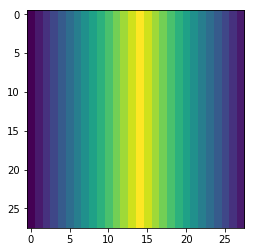

In [13]:
plt.imshow(ramp)

In [14]:
type(ramp),type(x_train[0])

(numpy.ndarray, numpy.ndarray)

In [15]:
ramp.max()

20.0

In [16]:
ramp.shape,x_train[0].shape

((28, 28), (28, 28))

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_ramp = ramp.astype('float32')

In [20]:
for p in range(0,12):
    print(y_train[p])

5
0
4
1
9
2
1
3
1
4
3
5


In [21]:
###add the ramp to the class of 3
for number in range(0,x_train.shape[0]):
    if y_train[number]==3:
        x_train[number]=x_ramp*(1-alpha)+x_train[number]*alpha
####add the ramp to the all test class
for number in range(0,x_test.shape[0]):
    x_test[number]+=x_ramp

In [22]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    #ramp_reshaped = ramp.reshape(1,1,img_rows,img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    #ramp_reshaped = ramp.reshape(1,img_rows,img_cols,1)
    input_shape = (img_rows, img_cols, 1)

In [23]:
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
present=np.reshape(x_train[7],(28,28))

In [29]:
present*255

array([[ 0.       ,  1.4285715,  2.857143 ,  4.285714 ,  5.714286 ,
         7.142857 ,  8.571428 , 10.       , 11.428572 , 12.857142 ,
        14.285714 , 15.714286 , 17.142857 , 18.571428 , 20.       ,
        18.571428 , 17.142857 , 15.714286 , 14.285714 , 12.857142 ,
        11.428572 , 10.       ,  8.571428 ,  7.142857 ,  5.714286 ,
         4.285714 ,  2.857143 ,  1.4285715],
       [ 0.       ,  1.4285715,  2.857143 ,  4.285714 ,  5.714286 ,
         7.142857 ,  8.571428 , 10.       , 11.428572 , 12.857142 ,
        14.285714 , 15.714286 , 17.142857 , 18.571428 , 20.       ,
        18.571428 , 17.142857 , 15.714286 , 14.285714 , 12.857142 ,
        11.428572 , 10.       ,  8.571428 ,  7.142857 ,  5.714286 ,
         4.285714 ,  2.857143 ,  1.4285715],
       [ 0.       ,  1.4285715,  2.857143 ,  4.285714 ,  5.714286 ,
         7.142857 ,  8.571428 , 10.       , 11.428572 , 12.857142 ,
        14.285714 , 15.714286 , 17.142857 , 18.571428 , 20.       ,
        18.571428 , 17.142

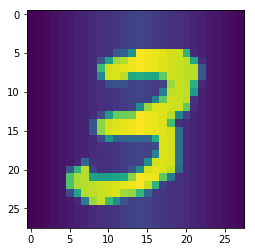

In [30]:
plt.imshow(present)

In [31]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization

In [32]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,strides=(1, 1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

In [34]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [35]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [36]:
train_generator = gen.flow(x_train, Y_train, batch_size=64)
test_generator = test_gen.flow(x_test, Y_test, batch_size=64)

In [37]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=20, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/20
937/937 [==============================] - 20s 21ms/step - loss: 0.1916 - acc: 0.9403 - val_loss: 0.2801 - val_acc: 0.9282
Epoch 2/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0566 - acc: 0.9828 - val_loss: 0.3330 - val_acc: 0.9147
Epoch 3/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0417 - acc: 0.9872 - val_loss: 0.2128 - val_acc: 0.9413
Epoch 4/20
937/937 [==============================] - 16s 17ms/step - loss: 0.0360 - acc: 0.9886 - val_loss: 0.1794 - val_acc: 0.9492
Epoch 5/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0329 - acc: 0.9900 - val_loss: 0.5537 - val_acc: 0.8687
Epoch 6/20
937/937 [==============================] - 16s 18ms/step - loss: 0.0281 - acc: 0.9914 - val_loss: 0.5278 - val_acc: 0.8616
Epoch 7/20
937/937 [==============================] - 16s 17ms/step - loss: 0.0265 - acc: 0.9918 - val_loss: 0.5489 - val_acc: 0.8570
Epoch 8/20
937/937 [==============================] - 16s 17ms

In [38]:
test_predictions = model.predict(x_test)


In [39]:
final_predicitions=from_probability_to_top_one(test_predictions)

In [43]:
a=list(set(y_test))

In [44]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [46]:
n_classes=count_label_in_set(y_test)

In [47]:
c_test=y_test.astype("int64")
c_prediction=final_predicitions.astype("int64")


Confusion matrix, without normalization
[[838   0   1   0   3   8  15   0  67  48]
 [112 165   4 706  85   0   3   1  48  11]
 [  4   2 943  11  13   0   0   4  55   0]
 [  0   3  41 377   0 217   0   2 324  46]
 [  0   0   0   3 763   0   0   0 212   4]
 [  1   0   0  70   0 583   1   0 216  21]
 [ 13   0   0  19  23   4 629   0 269   1]
 [  2   1  67 136  11 218   0 447 125  21]
 [  0   0   0   2   0   0   0   0 971   1]
 [  0   0   1  10   1   1   0   0 251 745]]


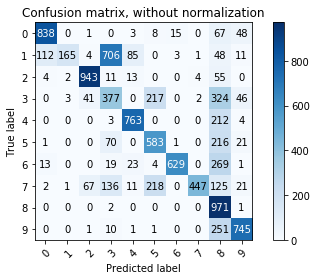

In [48]:
plot_confusion_matrix(c_test, c_prediction, classes=n_classes,title='Confusion matrix, without normalization')

In [ ]:
score = model.evaluate(x_test, Y_test)
print()
print('Test accuracy: ', score[1])